In [1]:
import pandas as pd

In [2]:
# hh_df = pd.read_csv('/home/ajha/AP2/data/combined_human-human-ocean.csv')
# hl_df = pd.read_csv('/home/ajha/AP2/data/combined_human-llm-ocean.csv')

hl_df = pd.read_csv('/home/ajha/AP2/data/combined_turns_expressive_hl_df_with_OCEAN.csv')

## combining all human_llm table features into one DF

In [11]:
hl_df = hl_df.drop(columns = ['article'])

In [3]:
hl_df

,conversation_id,combined_turns,text,Extroversion,Neuroticism,Agreeableness,Conscientiousness,Openness
0,2,"0,1,2,3","I feel very sad for the people. I know, it's h...",0.088314,0.091031,0.168691,-0.024247,0.222701
1,2,"4,5,6,7","I know we can donate, but it's hard to know ex...",0.107109,0.080249,-0.048783,-0.374928,0.236230
2,2,"8,9,10,11","Sorry to hear that, I'm glad that you are okay...",0.112407,0.123409,0.235080,0.048136,0.279493
3,2,"12,13,14,15","Yeah, we never know what we can do unless we a...",0.031832,0.160190,0.199546,0.591068,0.344124
4,2,"16,17,18,19,20,21",The power of nature is truly scary. It's a sob...,0.124512,0.006324,0.245904,0.359362,0.166492
...,...,...,...,...,...,...,...,...
1935,500,"0,1,2,3",Hi what u think? I'm glad the investigation ha...,0.191019,-0.033729,0.213079,0.055209,0.496099
1936,500,"4,5,6,7",I think so. why would he just kill himself Tha...,0.137418,-0.107242,0.244943,0.833886,0.106554
1937,500,"8,9,10,11",I feel bad for the guy's family Me too. It's a...,0.106669,-0.096969,0.235197,0.296612,0.282979
1938,500,"12,13,14,15","I have never fell while drinking have you? No,...",-0.059616,0.025128,0.210861,0.213862,0.228590


In [12]:
hl_df = hl_df.reset_index(drop=True)
hl_df["message_id"] = hl_df.index+1

## Pulling all the features from SQL DB

In [6]:
import pandas as pd
import mysql.connector

# Connect to MySQL
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    database='expressive_conversations',
    unix_socket='/home/ajha/mysql.sock',
    port=3307
)

# Helper function to load and pivot a DLATK-style feature table
def load_feature_table(table_name, conn):
    df = pd.read_sql(f"SELECT group_id AS message_id, feat, group_norm FROM `{table_name}`", conn)
    return df.pivot(index='message_id', columns='feat', values='group_norm').reset_index()

# Feature tables for human_llm
fa_table     = 'feat$cat_fa_promax_5_w$human_llm$message_id$1gra'
age_table    = 'feat$cat_dd_emnlp14_ageGender_w$human_llm$message_id$1gra'
empathy_table = 'feat$p_ridg_empathy$human_llm$message_id'

# Load all three and merge
df_fa      = load_feature_table(fa_table, conn)
df_age     = load_feature_table(age_table, conn)
df_empathy = load_feature_table(empathy_table, conn)

# Rename columns for clarity
df_empathy = df_empathy.rename(columns={'empathic_concern': 'empathy'})

# Merge them on message_id
llm_features = df_fa.merge(df_age, on='message_id', how='outer').merge(df_empathy, on='message_id', how='outer')

conn.close()


/tmp/ipykernel_869082/3769510387.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT group_id AS message_id, feat, group_norm FROM `{table_name}`", conn)
/tmp/ipykernel_869082/3769510387.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT group_id AS message_id, feat, group_norm FROM `{table_name}`", conn)
/tmp/ipykernel_869082/3769510387.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT group_id AS message_id, feat, group_norm FROM `{table_n

In [7]:
llm_features

feat,message_id,F0,F1,F2,F3,F4,_intercept,AGE,GENDER,empathy
0,1,0.002353,-0.025916,-0.006494,0.000372,-0.006786,1.0,27.412257,1.784557,2.132403
1,2,0.015189,-0.016128,-0.000365,0.004269,-0.021646,1.0,33.619993,-0.290782,1.911980
2,3,0.012477,-0.017303,-0.000653,0.002642,-0.009041,1.0,25.952887,3.003411,1.862986
3,4,0.034235,-0.019926,-0.004636,-0.002852,-0.028359,1.0,32.576069,2.365803,1.955787
4,5,0.009818,-0.015654,-0.003218,0.001956,-0.010413,1.0,34.150185,2.981322,1.964233
...,...,...,...,...,...,...,...,...,...,...
1935,1936,-0.000031,-0.012719,-0.003718,0.002916,-0.003733,1.0,27.714625,0.877866,1.284588
1936,1937,0.003342,-0.018454,-0.004035,0.001725,-0.012100,1.0,19.847622,-2.660514,0.983884
1937,1938,0.008910,-0.016328,-0.001919,-0.002240,-0.015876,1.0,21.898377,-1.329223,0.609615
1938,1939,0.029932,-0.019966,-0.004999,0.005337,-0.035535,1.0,20.804059,4.114260,1.451599


In [9]:
llm_features

feat,message_id,F0,F1,F2,F3,F4,_intercept,AGE,GENDER,llm_empathy
0,1,NaN,-0.013850,-0.018241,-0.002279,-0.047173,1.0,29.607957,4.349764,5.862038
1,2,-0.016353,-0.023030,0.005454,-0.001711,-0.002452,1.0,61.162687,3.232486,2.473445
2,3,NaN,NaN,-0.010246,NaN,NaN,1.0,-43.849813,8.986903,2.805588
3,4,-0.006357,-0.032053,-0.010060,0.001227,-0.002050,1.0,4.946140,-0.505757,1.762133
4,5,0.035451,-0.034893,-0.004781,0.008455,-0.052202,1.0,9.459925,2.278860,2.513940
...,...,...,...,...,...,...,...,...,...,...
8905,8906,0.023803,-0.017529,0.001827,NaN,-0.045019,1.0,1.521807,-3.159044,1.379415
8906,8907,0.012266,-0.006725,-0.010552,0.006326,-0.029243,1.0,40.028828,-4.265426,2.583115
8907,8908,0.004762,-0.034444,-0.011591,-0.026326,-0.028734,1.0,13.396049,-5.912572,1.533378
8908,8909,NaN,NaN,NaN,-0.051419,NaN,1.0,72.681761,0.737720,-2.588015


In [8]:
hl_df

,conversation_id,combined_turns,text,Extroversion,Neuroticism,Agreeableness,Conscientiousness,Openness
0,2,"0,1,2,3","I feel very sad for the people. I know, it's h...",0.088314,0.091031,0.168691,-0.024247,0.222701
1,2,"4,5,6,7","I know we can donate, but it's hard to know ex...",0.107109,0.080249,-0.048783,-0.374928,0.236230
2,2,"8,9,10,11","Sorry to hear that, I'm glad that you are okay...",0.112407,0.123409,0.235080,0.048136,0.279493
3,2,"12,13,14,15","Yeah, we never know what we can do unless we a...",0.031832,0.160190,0.199546,0.591068,0.344124
4,2,"16,17,18,19,20,21",The power of nature is truly scary. It's a sob...,0.124512,0.006324,0.245904,0.359362,0.166492
...,...,...,...,...,...,...,...,...
1935,500,"0,1,2,3",Hi what u think? I'm glad the investigation ha...,0.191019,-0.033729,0.213079,0.055209,0.496099
1936,500,"4,5,6,7",I think so. why would he just kill himself Tha...,0.137418,-0.107242,0.244943,0.833886,0.106554
1937,500,"8,9,10,11",I feel bad for the guy's family Me too. It's a...,0.106669,-0.096969,0.235197,0.296612,0.282979
1938,500,"12,13,14,15","I have never fell while drinking have you? No,...",-0.059616,0.025128,0.210861,0.213862,0.228590


In [9]:
hl_expressive_df_all_feat = pd.concat([hl_df.reset_index(drop=True), llm_features.reset_index(drop=True)], axis=1)

In [12]:
hl_expressive_df_all_feat = hl_expressive_df_all_feat.drop(columns=['message_id', '_intercept'])

In [17]:
hl_expressive_df_all_feat = hl_expressive_df_all_feat.fillna(0)

In [18]:
hl_expressive_df_all_feat.isna().sum()

conversation_id      0
combined_turns       0
text                 0
Extroversion         0
Neuroticism          0
Agreeableness        0
Conscientiousness    0
Openness             0
F0                   0
F1                   0
F2                   0
F3                   0
F4                   0
AGE                  0
GENDER               0
empathy              0
dtype: int64

In [19]:
hl_expressive_df_all_feat.to_csv('/home/ajha/AP2/data/combined_expressive_hl_df_all_features.csv', index=False)

In [14]:
hl_df_all_features = hl_df.merge(llm_features, on="message_id", how="left")

In [15]:
hl_df_all_features

,conversation_id,combined_turns,text,Extroversion,Neuroticism,Agreeableness,Conscientiousness,Openness,message_id,F0,F1,F2,F3,F4,_intercept,AGE,GENDER,llm_empathy
0,2,"0,1,4,5","I feel very sad for the people. Me too, it's h...",0.019073,0.048340,0.212465,-0.002822,0.110316,1,-0.009046,-0.024481,-0.004939,-0.000269,-0.005790,1.0,24.016167,2.091766,2.457488
1,2,"8,9,12,13","I know we can donate, but it's hard to know ex...",0.134261,-0.141653,0.272459,0.633150,0.113964,2,0.019764,-0.035857,0.000796,0.007841,-0.034218,1.0,21.014163,2.101785,2.038881
2,2,"16,17,20,21","Sorry to hear that, I'm glad that you are okay...",0.073363,0.130439,0.230720,0.137991,0.189078,3,-0.014298,-0.031365,-0.009632,0.001827,-0.006861,1.0,27.132503,2.408942,1.549897
3,2,"24,25,28,29","Yeah, we never know what we can do unless we a...",0.319315,0.076619,0.305884,0.760156,0.322419,4,0.010856,-0.011999,-0.002561,0.007109,-0.008538,1.0,32.086049,3.608921,2.127979
4,2,"32,33,36,37,40,41","The power of nature is truly scary. I know, ri...",0.000484,0.044724,0.056186,-0.117788,0.185441,5,0.014023,-0.019167,-0.005406,0.001190,-0.014963,1.0,15.465228,-0.442144,1.502860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1935,500,"0,1,4,5",Hi what u think? I think it's interesting that...,0.150052,-0.092064,0.159763,0.093267,0.414606,1936,-0.003414,-0.012639,0.000699,0.009339,-0.003867,1.0,26.226503,1.437363,1.658521
1936,500,"8,9,12,13",I think so. why would he just kill himself I k...,0.124793,-0.013452,0.169981,0.000720,0.279024,1937,0.003092,-0.012588,0.000191,0.006942,-0.013058,1.0,9.486203,-1.613993,1.843890
1937,500,"16,17,20,21","I feel bad for the guy's family Yeah, it's got...",0.130763,-0.145169,0.233797,0.206950,0.212956,1938,0.004147,-0.009482,-0.003562,-0.006366,-0.010821,1.0,29.335461,-2.010248,1.897870
1938,500,"24,25,28,29","I have never fell while drinking have you? No,...",0.033562,0.027761,0.091650,-0.036529,0.141267,1939,0.009796,-0.022277,-0.009258,0.010303,-0.005522,1.0,21.783382,3.554383,2.035275


In [16]:
hl_df_all_features.to_csv('/home/ajha/AP2/data/combined_hl_df_all_features.csv', index=False)

## combining all human-human features into one DF

In [17]:
hh_df

,conversation_id,combined_turns,text,Extroversion,Neuroticism,Agreeableness,Conscientiousness,Openness
0,2,"0,1,2,3",I feel very sad for the people. It's terrible....,-0.386121,0.085725,0.098945,0.096171,-0.215943
1,2,"4,5,6,7","I know we can donate, but it's hard to know ex...",0.053815,0.036639,0.170266,0.038132,0.181910
2,2,"8,9,10,11","Sorry to hear that, I'm glad that you are okay...",-0.044559,0.041204,0.181640,0.343868,-0.106651
3,2,"12,13,14,15","Yeah, we never know what we can do unless we a...",0.323724,0.083318,-0.039776,-0.382515,0.334512
4,2,"16,17,18,19,20",The power of nature is truly scary. Agree. I h...,0.074142,0.126690,-0.094245,-0.517369,0.017701
...,...,...,...,...,...,...,...,...
1935,500,"0,1,2,3",Hi what u think? I think Russia did it me too....,0.085374,0.109784,-0.222342,-0.820893,0.091809
1936,500,"4,5,6,7",I think so. why would he just kill himself I c...,-0.295934,0.030318,0.036301,-0.313268,-0.200512
1937,500,"8,9,10,11",I feel bad for the guy's family Me too. They a...,-0.103390,-0.122084,0.105223,-0.158656,-0.109265
1938,500,"12,13,14,15",I have never fell while drinking have you? No ...,0.316583,0.143305,-0.346340,-0.934081,0.174406


In [28]:
import pandas as pd
import mysql.connector

conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='',  # Fill if needed
    unix_socket='/home/ajha/mysql.sock',
    port=3307,
    database='conversations_combined_turns'
)

# Load all required tables
def extract_feature_table(table_name):
    return pd.read_sql(f"SELECT * FROM `{table_name}`", conn)

empathy_human = extract_feature_table("feat$p_ridg_empathy$human_human$message_id")
agegender_human = extract_feature_table("feat$cat_dd_emnlp14_ageGender_w$human_human$message_id$1gra")
fa_promax_human = extract_feature_table("feat$cat_fa_promax_5_w$human_human$message_id$1gra")

# Format the tables
agegender_human = agegender_human.pivot(index='group_id', columns='feat', values='group_norm').reset_index()
fa_promax_human = fa_promax_human.pivot(index='group_id', columns='feat', values='group_norm').reset_index()

# Rename keys
empathy_human = empathy_human.rename(columns={'group_id': 'message_id', 'value': 'empathy_human'})
agegender_human = agegender_human.rename(columns={'group_id': 'message_id'})
fa_promax_human = fa_promax_human.rename(columns={'group_id': 'message_id'})

# Combine into single DataFrame
human_features = empathy_human[['message_id', 'empathy_human']] \
    .merge(agegender_human, on='message_id', how='left') \
    .merge(fa_promax_human, on='message_id', how='left')



/tmp/ipykernel_3733669/3535171917.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(f"SELECT * FROM `{table_name}`", conn)


In [29]:
human_features

,message_id,empathy_human,AGE,GENDER,F0,F1,F2,F3,F4,_intercept
0,1,2.457488,-4.990500,3.085953,-0.005181,-0.019808,-0.008050,0.007980,-0.023901,1.0
1,2,2.038881,16.724385,3.959165,0.007788,-0.020573,0.001266,0.005605,-0.012707,1.0
2,3,1.549897,27.487277,3.560147,-0.015332,-0.029736,-0.008979,-0.005132,-0.012336,1.0
3,4,2.127979,37.634116,2.085156,0.045714,-0.012669,-0.001687,0.002812,-0.038820,1.0
4,5,1.502860,28.648408,-2.814454,0.012922,NaN,0.003879,0.000217,-0.002824,1.0
...,...,...,...,...,...,...,...,...,...,...
1935,1936,1.658521,40.084629,5.713243,NaN,NaN,NaN,0.026850,NaN,1.0
1936,1937,1.843890,-12.125927,-11.293403,NaN,-0.011540,-0.005364,0.017824,-0.044070,1.0
1937,1938,1.897870,24.930187,7.339867,0.032989,-0.007156,-0.006136,-0.005597,-0.045263,1.0
1938,1939,2.035275,30.101186,9.422522,0.015458,0.010218,NaN,NaN,-0.023568,1.0


In [27]:
combined_human_df.to_csv('/home/ajha/AP2/data/combined_hh_df_all_features.csv', index=False)

## plotting KDE plots

In [20]:
import pandas as pd

In [21]:
combined_human_df = pd.read_csv('/home/ajha/AP2/data/combined_hh_df_all_features.csv')
combined_hl_df = pd.read_csv('/home/ajha/AP2/data/combined_hl_df_all_features.csv')

In [22]:
combined_human_df.isna().sum()

conversation_id        0
combined_turns         0
text                   0
Extroversion           0
Neuroticism            0
Agreeableness          0
Conscientiousness      0
Openness               0
message_id             0
empathy_human          0
AGE                    0
GENDER                 0
F0                    63
F1                    92
F2                   103
F3                    44
F4                    54
_intercept             0
dtype: int64

In [23]:
combined_hl_df.isna().sum()

conversation_id       0
combined_turns        0
text                  0
Extroversion          0
Neuroticism           0
Agreeableness         0
Conscientiousness     0
Openness              0
message_id            0
F0                   29
F1                    4
F2                    4
F3                    6
F4                   16
_intercept            0
AGE                   0
GENDER                0
llm_empathy           0
dtype: int64

In [24]:
filled_na_hh_df = combined_human_df.fillna(0)

In [25]:
filled_na_hl_df = combined_hl_df.fillna(0)

In [26]:
filled_na_hh_df.columns

Index(['conversation_id', 'combined_turns', 'text', 'Extroversion',
       'Neuroticism', 'Agreeableness', 'Conscientiousness', 'Openness',
       'message_id', 'empathy_human', 'AGE', 'GENDER', 'F0', 'F1', 'F2', 'F3',
       'F4', '_intercept'],
      dtype='object')

In [27]:
filled_na_hl_df.columns

Index(['conversation_id', 'combined_turns', 'text', 'Extroversion',
       'Neuroticism', 'Agreeableness', 'Conscientiousness', 'Openness',
       'message_id', 'F0', 'F1', 'F2', 'F3', 'F4', '_intercept', 'AGE',
       'GENDER', 'llm_empathy'],
      dtype='object')

In [28]:

filled_na_hh_df = filled_na_hh_df.rename(columns={'empathy_human': 'empathy'})
filled_na_hl_df = filled_na_hl_df.rename(columns={'llm_empathy': 'empathy'})


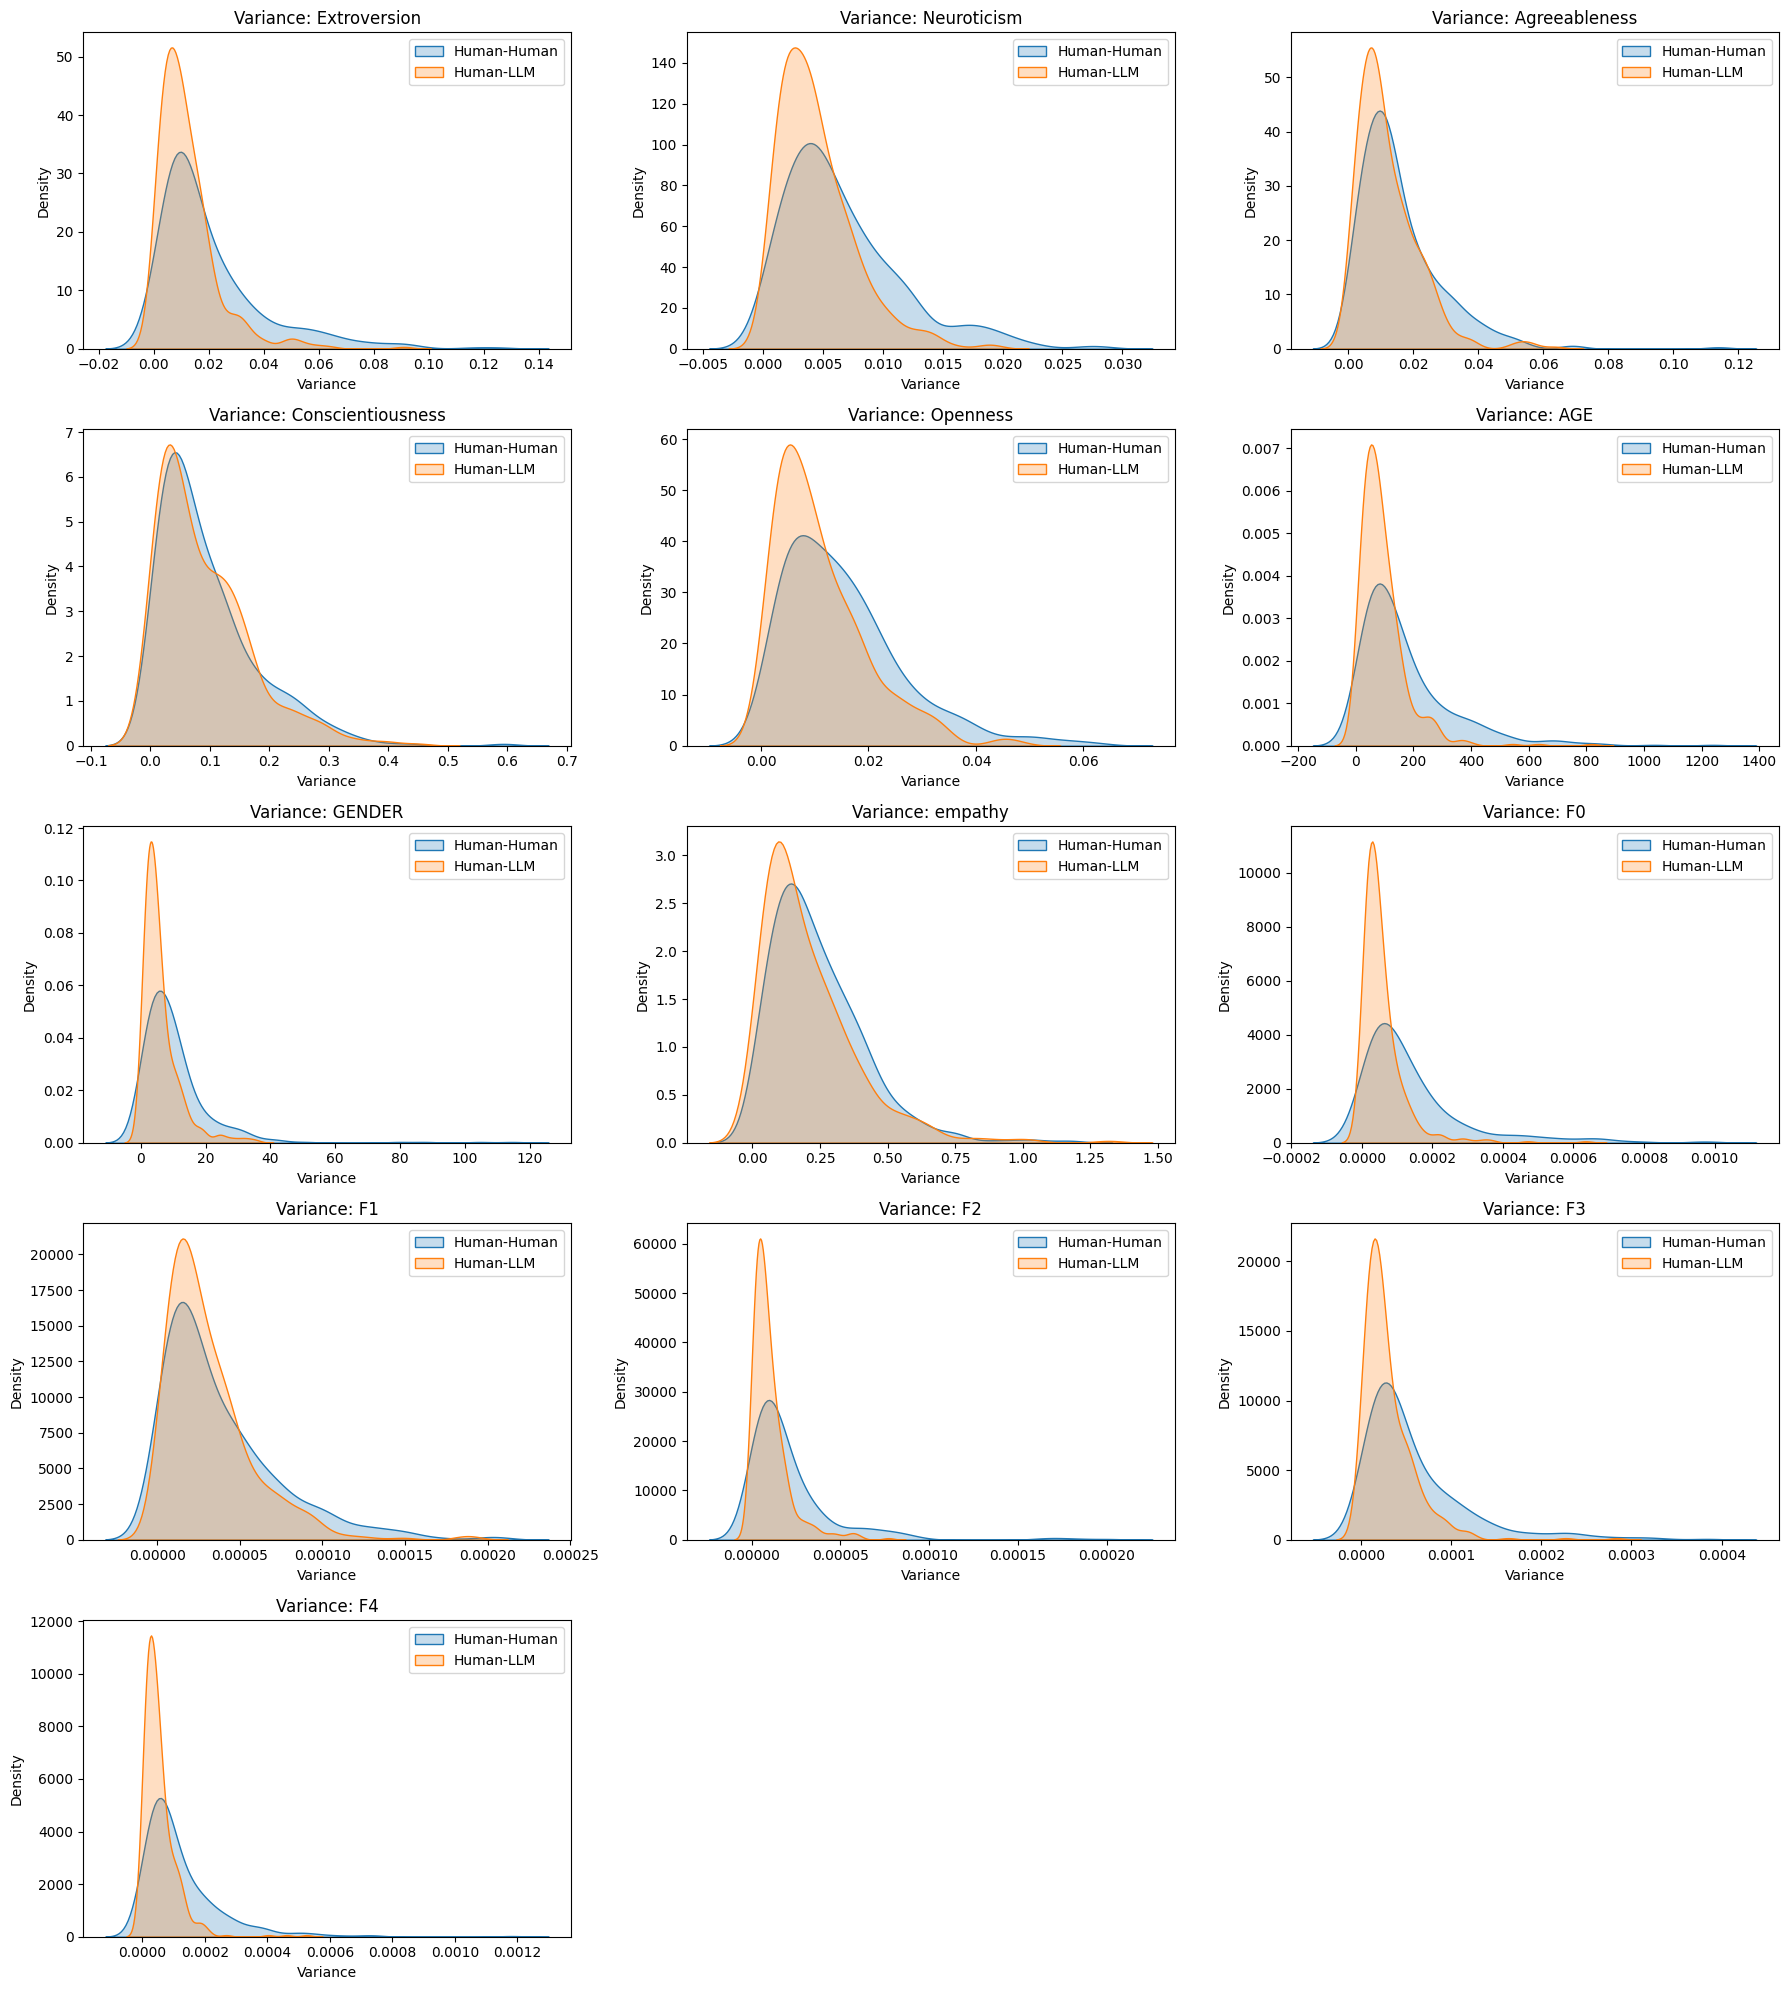

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Trait Columns
trait_cols = [
    'Extroversion', 'Neuroticism', 'Agreeableness',
    'Conscientiousness', 'Openness', 'AGE', 'GENDER', 'empathy',
    'F0', 'F1', 'F2', 'F3', 'F4'
]

# Compute Variance within Conversations
hh_var_df = filled_na_hh_df.groupby('conversation_id')[trait_cols].var()
hl_var_df = filled_na_hl_df.groupby('conversation_id')[trait_cols].var()

# Setup Subplots
n_traits = len(trait_cols)
n_cols = 3
n_rows = (n_traits + n_cols - 1) // n_cols  # Auto-calculate rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot per trait
for idx, trait in enumerate(trait_cols):
    sns.kdeplot(hh_var_df[trait].dropna(), label='Human-Human', fill=True, ax=axes[idx])
    sns.kdeplot(hl_var_df[trait].dropna(), label='Human-LLM', fill=True, ax=axes[idx])
    axes[idx].set_title(f'Variance: {trait}')
    axes[idx].set_xlabel('Variance')
    axes[idx].set_ylabel('Density')
    axes[idx].legend()

# Hide any unused subplots
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("/home/ajha/AP2/data/variance_kde_plots.jpeg", dpi=300)
plt.show()


In [15]:
import pandas as pd
from scipy.stats import ks_2samp
from scipy.spatial.distance import jensenshannon
import numpy as np


num_features = ['Extroversion', 'Neuroticism', 'Agreeableness', 'Conscientiousness', 'Openness',
                'F0', 'F1', 'F2', 'F3', 'F4', 'empathy', 'AGE', 'GENDER']

# Initialize results list
ks_results = []

for feature in num_features:
    # Drop NaNs for fair comparison
    x = filled_na_hh_df[feature].dropna()
    y = filled_na_hl_df[feature].dropna()
    
    ks_stat, p_value = ks_2samp(x, y)
    
    ks_results.append({
        'Feature': feature,
        'KS Statistic': ks_stat,
        'p-value': p_value,
        'Significant': 'Yes' if p_value < 0.05 else 'No'
    })


# Convert to DataFrame
ks_table = pd.DataFrame(ks_results)

# Display sorted by KS Statistic
ks_table_sorted = ks_table.sort_values(by='KS Statistic', ascending=False).reset_index(drop=True)


def compute_js_divergence(x, y, bins=50):
    # Compute normalized histograms (probability distributions)
    p_hist, bin_edges = np.histogram(x, bins=bins, range=(min(x.min(), y.min()), max(x.max(), y.max())), density=True)
    q_hist, _ = np.histogram(y, bins=bin_edges, density=True)
    
    # Normalize to ensure sum = 1
    p = p_hist / np.sum(p_hist)
    q = q_hist / np.sum(q_hist)
    
    # Return JS divergence (squared to match divergence scale)
    return jensenshannon(p, q) ** 2

# Add JS Divergence to the table
js_divergences = []

for feature in ks_table_sorted['Feature']:
    x = filled_na_hh_df[feature].dropna()
    y = filled_na_hl_df[feature].dropna()
    js = compute_js_divergence(x, y)
    js_divergences.append(js)

# Add new column
ks_table_sorted['JS Divergence'] = js_divergences

# Show updated table
print(ks_table_sorted)

              Feature  KS Statistic        p-value Significant  JS Divergence
0                  F1      0.487629  1.634654e-209         Yes       0.170672
1   Conscientiousness      0.389691  8.674972e-132         Yes       0.120302
2            Openness      0.364948  3.044869e-115         Yes       0.107919
3       Agreeableness      0.303093   4.917498e-79         Yes       0.083090
4        Extroversion      0.177320   4.745687e-27         Yes       0.027280
5                  F4      0.164433   2.646430e-23         Yes       0.032819
6                  F2      0.131959   3.898269e-15         Yes       0.021361
7         Neuroticism      0.112887   3.501015e-11         Yes       0.019659
8                  F0      0.110309   1.073393e-10         Yes       0.035623
9              GENDER      0.098969   1.089310e-08         Yes       0.015772
10                AGE      0.093814   7.529935e-08         Yes       0.021576
11            empathy      0.082990   3.112396e-06         Yes  

### expressive conversation

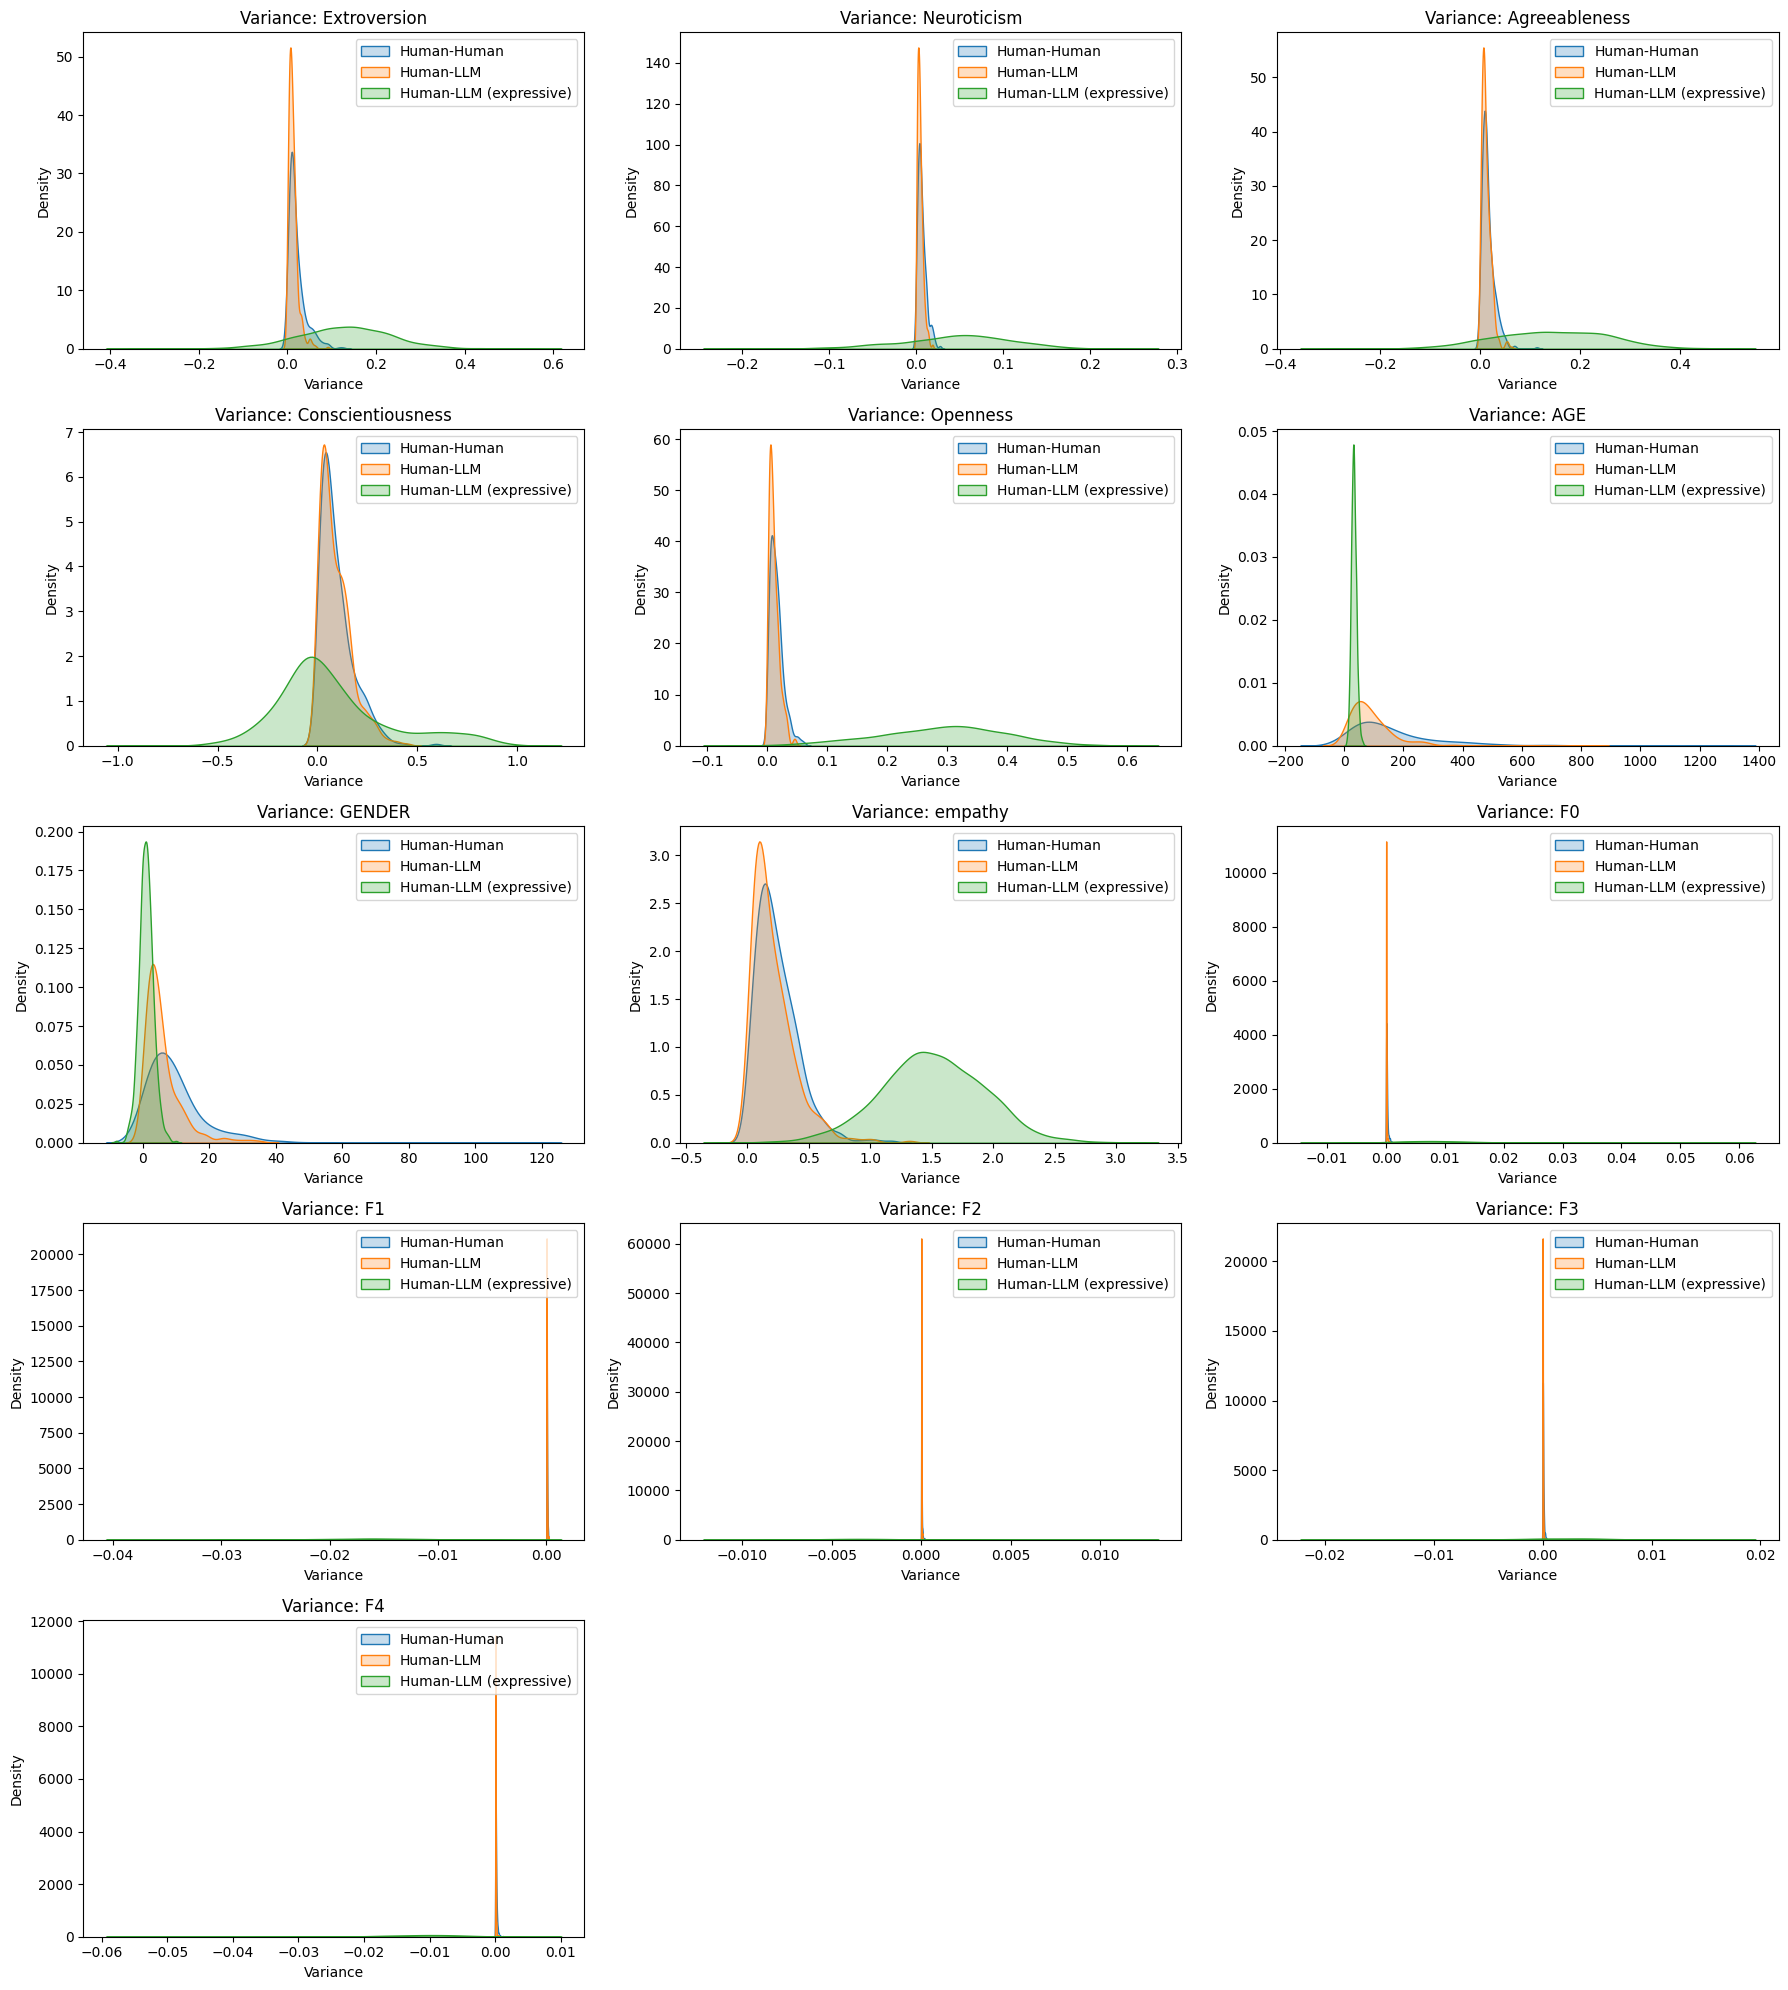

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Trait Columns
trait_cols = [
    'Extroversion', 'Neuroticism', 'Agreeableness',
    'Conscientiousness', 'Openness', 'AGE', 'GENDER', 'empathy',
    'F0', 'F1', 'F2', 'F3', 'F4'
]

# Compute Variance within Conversations
hh_var_df = filled_na_hh_df.groupby('conversation_id')[trait_cols].var()
hl_var_df = filled_na_hl_df.groupby('conversation_id')[trait_cols].var()
hl_expressive_var_df = hl_expressive_df_all_feat.groupby('conversation_id')[trait_cols].var()

# Setup Subplots
n_traits = len(trait_cols)
n_cols = 3
n_rows = (n_traits + n_cols - 1) // n_cols  # Auto-calculate rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot per trait
for idx, trait in enumerate(trait_cols):
    sns.kdeplot(hh_var_df[trait].dropna(), label='Human-Human', fill=True, ax=axes[idx])
    sns.kdeplot(hl_var_df[trait].dropna(), label='Human-LLM', fill=True, ax=axes[idx])
    sns.kdeplot(hl_expressive_df_all_feat[trait].dropna(), label='Human-LLM (expressive)', fill=True, ax=axes[idx])
    axes[idx].set_title(f'Variance: {trait}')
    axes[idx].set_xlabel('Variance')
    axes[idx].set_ylabel('Density')
    axes[idx].legend()

# Hide any unused subplots
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("/home/ajha/AP2/data/variance_expressive_kde_plots.jpeg", dpi=300)
plt.show()


In [41]:
import pandas as pd
from scipy.stats import ks_2samp
from scipy.spatial.distance import jensenshannon
import numpy as np


num_features = ['Extroversion', 'Neuroticism', 'Agreeableness', 'Conscientiousness', 'Openness',
                'F0', 'F1', 'F2', 'F3', 'F4', 'empathy', 'AGE', 'GENDER']

# Initialize results list
ks_results = []

for feature in num_features:
    # Drop NaNs for fair comparison
    x = filled_na_hh_df[feature].dropna()
    y = hl_expressive_var_df[feature].dropna()
    
    ks_stat, p_value = ks_2samp(x, y)
    
    ks_results.append({
        'Feature': feature,
        'KS Statistic': ks_stat,
        'p-value': p_value,
        'Significant': 'Yes' if p_value < 0.05 else 'No'
    })


# Convert to DataFrame
ks_table = pd.DataFrame(ks_results)

# Display sorted by KS Statistic
ks_table_sorted = ks_table.sort_values(by='KS Statistic', ascending=False).reset_index(drop=True)


def compute_js_divergence(x, y, bins=50):
    # Compute normalized histograms (probability distributions)
    p_hist, bin_edges = np.histogram(x, bins=bins, range=(min(x.min(), y.min()), max(x.max(), y.max())), density=True)
    q_hist, _ = np.histogram(y, bins=bin_edges, density=True)
    
    # Normalize to ensure sum = 1
    p = p_hist / np.sum(p_hist)
    q = q_hist / np.sum(q_hist)
    
    # Return JS divergence (squared to match divergence scale)
    return jensenshannon(p, q) ** 2

# Add JS Divergence to the table
js_divergences = []

for feature in ks_table_sorted['Feature']:
    x = filled_na_hh_df[feature].dropna()
    y = hl_expressive_var_df[feature].dropna()
    js = compute_js_divergence(x, y)
    js_divergences.append(js)

# Add new column
ks_table_sorted['JS Divergence'] = js_divergences

# Show updated table
print(ks_table_sorted)

              Feature  KS Statistic        p-value Significant  JS Divergence
0             empathy      0.970063  8.893182e-323         Yes       0.642989
1                  F1      0.921134  4.586802e-314         Yes       0.581890
2                  F4      0.920103  6.020965e-313         Yes       0.575211
3   Conscientiousness      0.774227  3.817757e-196         Yes       0.496086
4                  F2      0.747423  3.514387e-180         Yes       0.526216
5            Openness      0.736002  9.151411e-174         Yes       0.547186
6                  F0      0.734021  1.267940e-172         Yes       0.533530
7         Neuroticism      0.638144  1.330625e-125         Yes       0.528370
8                  F3      0.567526   3.446263e-97         Yes       0.529953
9        Extroversion      0.518965   2.638987e-80         Yes       0.488002
10      Agreeableness      0.505048   7.978207e-76         Yes       0.520671
11             GENDER      0.469005   6.015500e-65         Yes  